<a href="https://colab.research.google.com/github/ndViet27/KPDL_Nhom3_Clustering1/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load dữ liệu từ Drive

In [1]:
# prompt: import csv file from drive

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Replace 'your_file.csv' with the actual name of your CSV file and the path to it in your Google Drive.
# Example: '/content/drive/MyDrive/Colab Notebooks/your_file.csv'
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Diabetes/diabetes.csv')

# Now you can work with the DataFrame 'df'
df.head(10)

Mounted at /content/drive


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#Chuyển cột Outcome từ Int64 sang Category

In [3]:
df['Outcome'] = df['Outcome'].astype('category', copy=False)

def convert_outcome(x):
  if x == 0:
    return 'Non-Diabetic'
  else:
    return 'Diabetic'

df['Outcome'] = df['Outcome'].apply(convert_outcome)


In [9]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic
5,5,116,74,0,0,25.6,0.201,30,Non-Diabetic
6,3,78,50,32,88,31.0,0.248,26,Diabetic
7,10,115,0,0,0,35.3,0.134,29,Non-Diabetic
8,2,197,70,45,543,30.5,0.158,53,Diabetic
9,8,125,96,0,0,0.0,0.232,54,Diabetic


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


# Phân cụm KMeans với Glucose và BMI

In [11]:
import plotly.express as px

fig = px.scatter(df, x='Glucose', y='BMI', color='Outcome')
fig.show()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

cluster_cols = ['Glucose', 'BMI']
#create subset
X = np.array(df[cluster_cols])
print(X)
# X = StandardScaler().fit_transform(X)

[[148.   33.6]
 [ 85.   26.6]
 [183.   23.3]
 ...
 [121.   26.2]
 [126.   30.1]
 [ 93.   30.4]]


In [23]:
best_cluster_number = 9
kmeans = KMeans(n_clusters=best_cluster_number, random_state=42)
kmeans.fit(X)

centroids = kmeans.cluster_centers_

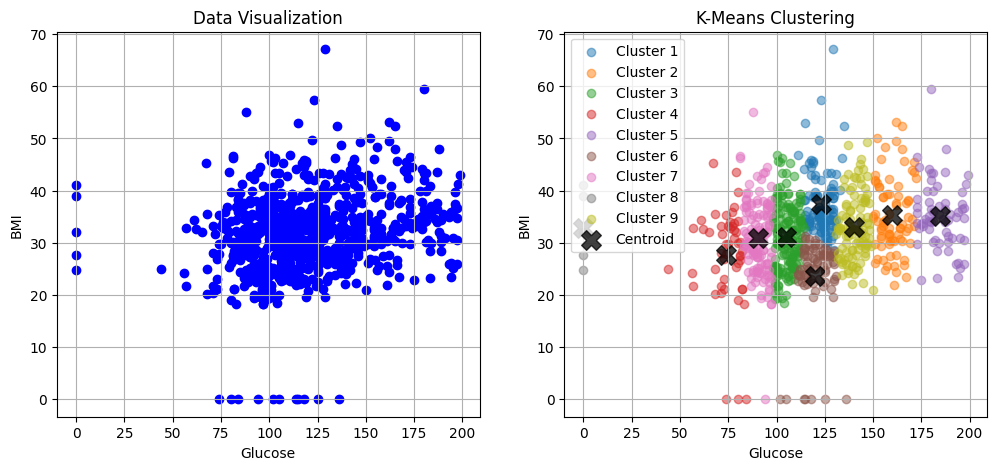

In [35]:
import matplotlib.pyplot as plt

def drawplt(data, centers, kmeans):
    plt.figure(figsize=(12, 5))


    plt.subplot(1, 2, 1)
    plt.title("Data Visualization")
    plt.scatter(data[:,0], data[:,1], c='b')
    plt.xlabel("Glucose")
    plt.ylabel("BMI")
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.title("K-Means Clustering")
    for cluster_id in range(len(centers)):
        cluster_points = data[kmeans.labels_ == cluster_id] #lấy ra các điểm theo cụm tương ứng
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id + 1}', alpha=0.5)
    plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', label='Centroid', s=200, alpha=0.75)
    plt.legend()
    plt.xlabel("Glucose")
    plt.ylabel("BMI")
    plt.grid(True)
    plt.show()

drawplt(X, centroids, kmeans)

In [42]:
# prompt: drawplt with px
def drawplt_px(data, centers, kmeans):
    df = pd.DataFrame(data, columns=['Glucose', 'BMI'])
    df['Cluster'] = kmeans.labels_
    df_centers = pd.DataFrame(centers, columns=['Glucose', 'BMI'])
    df_centers['Cluster'] = range(len(centers))

    fig = px.scatter(df, x='Glucose', y='BMI', color='Cluster', title='K-Means Clustering',color_continuous_scale='Viridis')
    fig.add_scatter(x=df_centers['Glucose'], y=df_centers['BMI'], mode='markers', marker=dict(size=10, color='red', symbol='x'), name='Centroids')
    fig.show()


drawplt_px(X, centroids, kmeans)